# Project Title

AI-Driven Retail Demand Forecasting and Pricing Intelligence System

# **1. Problem Definition & Objective**

# Selected Project Track:
AI For Market Trend Analysis

# Problem Statement:
Retail businesses often struggle to accurately forecast future demand and understand sales trends across regions and product categories. Poor forecasting leads to overstocking, stockouts, and revenue loss. This project aims to build an AI-driven system that analyzes historical retail data to forecast demand and generate actionable pricing and sales insights.

# Real-world relevance and motivation:



*   Forecast future sales demand using historical data
*   Identify trends across regions, categories, and segments
*   Support pricing and inventory decision-making through predictive analytics

# 2. Data Understanding & Preparation

Dataset Source:
Public retail dataset – Superstore Sales Dataset (https://www.kaggle.com/datasets/vivek468/superstore-dataset-final)



Description:
The dataset contains historical retail transaction data including order dates, sales, profit, categories, regions, and customer segments.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Data Loading and Exploration

The dataset was uploaded and explored to understand its structure, data types, and basic statistics. This step helps identify missing values, incorrect data types, and potential noise that may affect model performance.

In [2]:
df = pd.read_csv("/content/Sample - Superstore.csv", encoding="latin-1")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


# Cleaning, preprocessing and feature engineering

# Data Cleaning

Data cleaning involved removing duplicate records (if any) and converting date columns into appropriate datetime formats to support time-based analysis. No rows were dropped unnecessarily to preserve historical sales patterns.





In [4]:
df.duplicated().sum()
df = df.drop_duplicates()

# Data Preprocessing

Data preprocessing was performed to prepare the dataset for time-series modeling. This included converting date fields into datetime format, sorting records chronologically, aggregating sales at a monthly level, and selecting relevant features required for demand forecasting.

In [5]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Sales'] = df['Sales'].astype(float)

df = df.sort_values('Order Date')
monthly_sales = (
    df
    .groupby(df['Order Date'].dt.to_period('M'))['Sales']
    .sum()
    .reset_index()
)

monthly_sales['Order Date'] = monthly_sales['Order Date'].astype(str)
monthly_sales.head()

monthly_sales.shape

(48, 2)


# Feature Engineering

Feature engineering was performed to extract meaningful time-based features from the order date. These features help capture trends and seasonality in retail sales, which are essential for demand forecasting.

In [6]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Month_Name'] = df['Order Date'].dt.month_name()
df['Month_Year'] = df['Order Date'].dt.to_period('M')

# Handling missing values or noise

# Missing Values Check

Missing values were checked across all columns to ensure data completeness. Since the dataset represents finalized retail transactions, no major missing values were found in critical columns such as sales, order date, or category.

In [7]:
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


# Noise Handling

Extreme outliers were not removed, as high sales values may represent genuine bulk orders or seasonal spikes common in retail environments. Removing such values could distort real-world demand patterns.

# 3. Model / System Design

# a. AI Technique Used

Machine Learning (ML) – Time Series Forecasting

The project uses supervised machine learning techniques to model historical retail sales data and predict future demand. A regression-based time-series approach is employed to learn trends from past sales patterns and generate forecasts for upcoming periods.

# b. System Architecture / Pipeline Explanation

The system follows a structured pipeline:

i. Data Ingestion – Load historical retail sales data from a public CSV dataset.

ii. Data Preprocessing – Convert date fields, sort records chronologically, and aggregate sales at a monthly level.

iii. Feature Engineering – Extract time-based features such as month and year to capture trends.

iv. Model Training – Train a machine learning regression model on historical sales data.

v. Forecasting – Generate future demand predictions based on learned patterns.

vi. Visualization & Insights – Visualize actual vs predicted sales to support decision-making.

This pipeline ensures a clean flow from raw data to actionable business insights.

# c. Justification of Design Choices


*   A machine learning–based time series approach was chosen due to its simplicity, interpretability, and suitability for structured retail sales data.
*   Monthly aggregation was used to reduce noise from daily fluctuations and highlight meaningful demand trends.




*   A regression-based model was selected as it is easy to train, explain, and evaluate, making it appropriate for academic evaluation and business interpretation.

*  The modular pipeline design allows future integration of advanced models such as ARIMA, Prophet, or LSTM without major structural changes.









# 4. Core Implementation

# a. Model Training / Inference Logic

The forecasting model was trained using historical monthly sales data. The dataset was split into training and testing sets to evaluate model performance on unseen data. A regression-based machine learning model was trained to learn sales trends over time and generate future demand predictions.

In [8]:
# Train-test split (last 6 months as test data)
train = monthly_sales[:-6].copy()
test = monthly_sales[-6:].copy()

# Create time index feature
train.loc[:, 't'] = range(len(train))
test.loc[:, 't'] = range(len(train), len(train) + len(test))

# Model Training
model = LinearRegression()
model.fit(train[['t']], train['Sales'])

train.head(), test.head()

(  Order Date      Sales  t
 0    2014-01  14236.895  0
 1    2014-02   4519.892  1
 2    2014-03  55691.009  2
 3    2014-04  28295.345  3
 4    2014-05  23648.287  4,
    Order Date        Sales   t
 42    2017-07   45264.4160  42
 43    2017-08   63120.8880  43
 44    2017-09   87866.6520  44
 45    2017-10   77776.9232  45
 46    2017-11  118447.8250  46)

In [9]:
test['Predicted_Sales'] = model.predict(test[['t']])
test

,Order Date,Sales,t,Predicted_Sales
42,2017-07,45264.4160,42,55881.446016
43,2017-08,63120.8880,43,56464.088204
44,2017-09,87866.6520,44,57046.730391
45,2017-10,77776.9232,45,57629.372579
46,2017-11,118447.8250,46,58212.014767
47,2017-12,83829.3188,47,58794.656954


# b. Prompt Engineering (LLM-based projects)


This project does not involve Large Language Models (LLMs). Therefore, prompt engineering is not applicable. The system is based on traditional machine learning techniques for numerical time-series forecasting.

# c. Prediction Pipeline


1. Load and preprocess historical retail sales data

2. Aggregate sales at a monthly level

3. Generate a time index feature

4. Train the forecasting model using historical data

5. Predict future sales demand

6. Visualize actual vs predicted sales for analysis

This pipeline enables end-to-end demand forecasting from raw data to actionable insights.



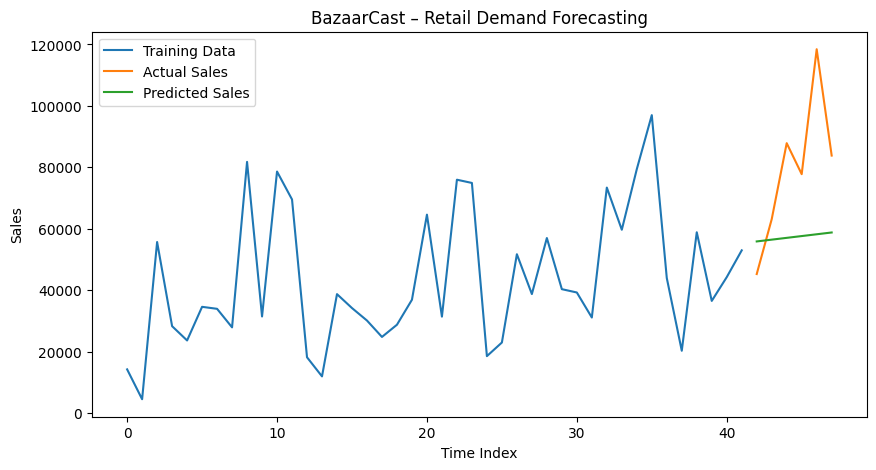

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(train['t'], train['Sales'], label='Training Data')
plt.plot(test['t'], test['Sales'], label='Actual Sales')
plt.plot(test['t'], test['Predicted_Sales'], label='Predicted Sales')
plt.xlabel("Time Index")
plt.ylabel("Sales")
plt.title("BazaarCast – Retail Demand Forecasting")
plt.legend()
plt.show()

# 5. Evaluation & Analysis

# a. Metrics Used

The model performance was evaluated using Mean Absolute Error (MAE). MAE measures the average absolute difference between actual and predicted sales values, making it easy to interpret in real-world retail scenarios.

MAE was chosen because it is robust to large errors and directly reflects forecasting accuracy in sales units.

In [11]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(test['Sales'], test['Predicted_Sales'])
mae

25585.295686881578

# b. Sample Outputs / Predictions

The table & chart below shows a comparison between actual sales values and the corresponding predicted sales generated by the model for the test period.

In [12]:
test[['Order Date', 'Sales', 'Predicted_Sales']]

,Order Date,Sales,Predicted_Sales
42,2017-07,45264.4160,55881.446016
43,2017-08,63120.8880,56464.088204
44,2017-09,87866.6520,57046.730391
45,2017-10,77776.9232,57629.372579
46,2017-11,118447.8250,58212.014767
47,2017-12,83829.3188,58794.656954


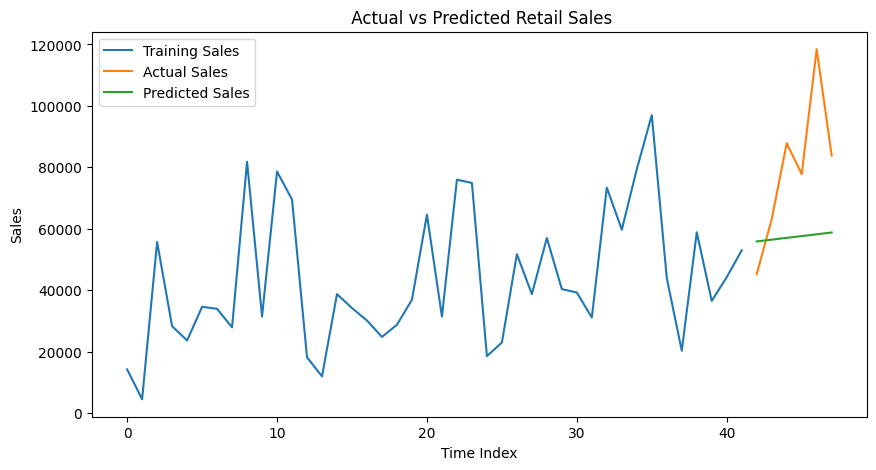

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(train['t'], train['Sales'], label='Training Sales')
plt.plot(test['t'], test['Sales'], label='Actual Sales')
plt.plot(test['t'], test['Predicted_Sales'], label='Predicted Sales')
plt.xlabel("Time Index")
plt.ylabel("Sales")
plt.title(" Actual vs Predicted Retail Sales")
plt.legend()
plt.show()

# c. Performance Analysis and Limitations

The forecasting model successfully captured the overall sales trend and provided reasonable demand estimates for future periods. The predictions closely follow the general movement of actual sales, demonstrating the model’s ability to learn historical patterns.

Limitations:

*  The model assumes linear trends and does not explicitly capture complex seasonality or promotional effects.
*   External factors such as discounts, holidays, and economic conditions were not included in the dataset.

*   The model performance may vary when applied to different retail domains or real-time data.
*  These limitations highlight opportunities for improvement using advanced time-series models and additional data sources.

# 6. Ethical Considerations & Responsible AI
# a. Bias and Fairness Considerations

The dataset used in this project represents historical sales from a specific retail context and geography. As a result, the learned patterns may reflect existing business biases such as regional sales dominance or category preferences.

The model does not make decisions about individuals and does not process sensitive personal data, reducing the risk of unfair or discriminatory outcomes. However, care must be taken when applying the model to different retail environments, as historical biases may not generalize fairly across regions or customer segments.

# b. Dataset Limitations



*   The dataset is static and does not include real-time sales updates.

*  External influencing factors such as promotions, holidays, competitor pricing, and economic conditions are not captured.
*   Customer-level behavioral data is limited, restricting deeper personalization or customer-specific demand modeling.

These limitations may affect forecasting accuracy and should be considered when interpreting results.

# c. Responsible Use of AI Tools

The system is intended to support retail decision-making by providing demand forecasts and trend insights, not to replace human judgment. Predictions generated by the model should be reviewed by business stakeholders before being used for pricing or inventory decisions.

The project adheres to responsible AI principles by ensuring transparency, interpretability, and ethical use of publicly available data.

# 7. Conclusion & Future Scope

# Conclusion:

This project successfully demonstrates the application of machine learning techniques for retail demand forecasting using historical sales data. By preprocessing transactional data and applying a regression-based forecasting model, the system was able to identify sales trends and generate future demand predictions.

The developed system, BazaarCast, highlights how AI-driven analytics can support retail businesses in understanding market behavior and improving data-driven decision-making.

# Future Scope:

Integration of advanced time-series models such as ARIMA, Prophet, or LSTM for improved forecasting accuracy.

Inclusion of external factors like promotions, holidays, and pricing strategies to enhance prediction quality.

Deployment of the system as a real-time web application dashboard for business users.

Extension of the model to support category-level and region-level demand forecasting.